In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_excel(r"C:\Users\denni\Downloads\dognition_data.xlsx")

In [3]:
df.head()

,Created_at,Updated_at,User_ID,Dog_ID,Test_name,Subcategory_name,Gender,Birthday,Breed,Breed_Type,...,State,Zip,Country,Exclude,Free_Start_User,Last_Active_At,Membership_Type,Rating,Rank_by_UserID,Rank_by_DogID
0,2013-05-13 16:17:00,2013-05-13 16:17:00,ce134a78-7144-11e5-ba71-058fbc01cf0b,fd3d1b44-7144-11e5-ba71-058fbc01cf0b,Yawn Warm-up,Empathy,male,2009,Shih Tzu,Pure Breed,...,NC,27701,US,1,0,2015-02-23 13:39:00,2,NaN,1.0,1.0
1,2013-05-22 18:54:00,2013-05-22 18:54:00,ce134a78-7144-11e5-ba71-058fbc01cf0b,fd3d1b44-7144-11e5-ba71-058fbc01cf0b,Yawn Game,Empathy,male,2009,Shih Tzu,Pure Breed,...,NC,27701,US,1,0,2015-02-23 13:39:00,2,NaN,2.0,2.0
2,2013-05-22 18:55:00,2013-05-22 18:55:00,ce134a78-7144-11e5-ba71-058fbc01cf0b,fd3d1b44-7144-11e5-ba71-058fbc01cf0b,Eye Contact Warm-up,Empathy,male,2009,Shih Tzu,Pure Breed,...,NC,27701,US,1,0,2015-02-23 13:39:00,2,NaN,3.0,3.0
3,2013-05-22 18:56:00,2013-05-22 18:56:00,ce134a78-7144-11e5-ba71-058fbc01cf0b,fd3d1b44-7144-11e5-ba71-058fbc01cf0b,Eye Contact Game,Empathy,male,2009,Shih Tzu,Pure Breed,...,NC,27701,US,1,0,2015-02-23 13:39:00,2,NaN,4.0,4.0
4,2013-05-22 18:58:00,2013-05-22 18:58:00,ce134a78-7144-11e5-ba71-058fbc01cf0b,fd3d1b44-7144-11e5-ba71-058fbc01cf0b,Treat Warm-up,Communication,male,2009,Shih Tzu,Pure Breed,...,NC,27701,US,1,0,2015-02-23 13:39:00,2,NaN,5.0,5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177481 entries, 0 to 177480
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Created_at        177481 non-null  datetime64[ns]
 1   Updated_at        177481 non-null  datetime64[ns]
 2   User_ID           177481 non-null  object        
 3   Dog_ID            177481 non-null  object        
 4   Test_name         177481 non-null  object        
 5   Subcategory_name  177481 non-null  object        
 6   Gender            177481 non-null  object        
 7   Birthday          177481 non-null  int64         
 8   Breed             177279 non-null  object        
 9   Breed_Type        177481 non-null  object        
 10  Breed_Group       88923 non-null   object        
 11  Weight            177481 non-null  int64         
 12  Dog_Fixed         175317 non-null  float64       
 13  DNA_Tested        52968 non-null   float64       
 14  Dime

In [5]:
df.shape

(177481, 30)

In [6]:
#checking duplicates

df.duplicated().sum()

216

In [7]:
df.drop_duplicates(inplace = True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(177265, 30)

<AxesSubplot:>

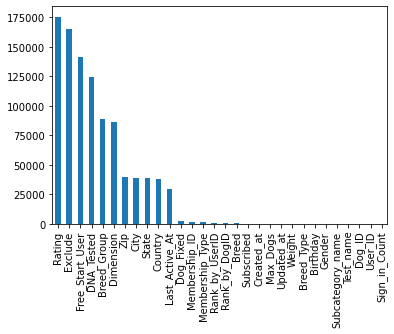

In [11]:
df.isnull().sum().sort_values(ascending= False).plot.bar()

In [12]:
df_copy = df.copy()

In [13]:
missing_cols = ['Rating','Exclude','Free_Start_User','DNA_Tested','Breed_Group','Dimension','Zip','City',
                'State', 'Country','Last_Active_At','Dog_Fixed','Membership_ID','Membership_Type','Rank_by_UserID',
                'Rank_by_DogID','Breed']

In [14]:
for col in missing_cols:
    df[col] = df[col].replace({np.nan:df[col].mode()[0]})

In [15]:
df.isnull().sum()

Created_at          0
Updated_at          0
User_ID             0
Dog_ID              0
Test_name           0
Subcategory_name    0
Gender              0
Birthday            0
Breed               0
Breed_Type          0
Breed_Group         0
Weight              0
Dog_Fixed           0
DNA_Tested          0
Dimension           0
Sign_in_Count       0
Max_Dogs            0
Membership_ID       0
Subscribed          0
City                0
State               0
Zip                 0
Country             0
Exclude             0
Free_Start_User     0
Last_Active_At      0
Membership_Type     0
Rating              0
Rank_by_UserID      0
Rank_by_DogID       0
dtype: int64

In [16]:
date_cols = ['Created_at','Updated_at','Last_Active_At']

In [17]:
df['date_created_at'] = df.Created_at.dt.date
df['date_created_at']

0         2013-05-13
1         2013-05-22
2         2013-05-22
3         2013-05-22
4         2013-05-22
             ...    
177476    2013-05-14
177477    2013-05-14
177478    2013-05-14
177479    2013-05-19
177480    2013-05-19
Name: date_created_at, Length: 177265, dtype: object

In [18]:
df['date_updated_at'] = df.Updated_at.dt.date
df['date_updated_at']

0         2013-05-13
1         2013-05-22
2         2013-05-22
3         2013-05-22
4         2013-05-22
             ...    
177476    2013-05-14
177477    2013-05-14
177478    2013-05-14
177479    2013-05-19
177480    2013-05-19
Name: date_updated_at, Length: 177265, dtype: object

In [20]:
df.loc[df.Last_Active_At.isin(['BC','NL','NS','ON','QC'])]

,Created_at,Updated_at,User_ID,Dog_ID,Test_name,Subcategory_name,Gender,Birthday,Breed,Breed_Type,...,Country,Exclude,Free_Start_User,Last_Active_At,Membership_Type,Rating,Rank_by_UserID,Rank_by_DogID,date_created_at,date_updated_at
20,2013-05-17 17:45:00,2013-05-17 17:45:00,ce134be0-7144-11e5-ba71-058fbc01cf0b,fd27c956-7144-11e5-ba71-058fbc01cf0b,Yawn Warm-up,Empathy,male,2010,German Shepherd Dog-Nova Scotia Duck Tolling R...,Cross Breed,...,US,0,1,ON,2,1.0,1.0,1.0,2013-05-17,2013-05-17
21,2013-05-17 17:50:00,2013-05-17 17:50:00,ce134be0-7144-11e5-ba71-058fbc01cf0b,fd27c956-7144-11e5-ba71-058fbc01cf0b,Yawn Game,Empathy,male,2010,German Shepherd Dog-Nova Scotia Duck Tolling R...,Cross Breed,...,US,0,1,ON,2,1.0,2.0,2.0,2013-05-17,2013-05-17
22,2013-05-17 17:55:00,2013-05-17 17:55:00,ce134be0-7144-11e5-ba71-058fbc01cf0b,fd27c956-7144-11e5-ba71-058fbc01cf0b,Eye Contact Warm-up,Empathy,male,2010,German Shepherd Dog-Nova Scotia Duck Tolling R...,Cross Breed,...,US,0,1,ON,2,1.0,3.0,3.0,2013-05-17,2013-05-17
23,2013-05-17 17:57:00,2013-05-17 17:57:00,ce134be0-7144-11e5-ba71-058fbc01cf0b,fd27c956-7144-11e5-ba71-058fbc01cf0b,Eye Contact Game,Empathy,male,2010,German Shepherd Dog-Nova Scotia Duck Tolling R...,Cross Breed,...,US,0,1,ON,2,1.0,4.0,4.0,2013-05-17,2013-05-17
24,2013-05-17 18:02:00,2013-05-17 18:02:00,ce134be0-7144-11e5-ba71-058fbc01cf0b,fd27c956-7144-11e5-ba71-058fbc01cf0b,Treat Warm-up,Communication,male,2010,German Shepherd Dog-Nova Scotia Duck Tolling R...,Cross Breed,...,US,0,1,ON,2,1.0,5.0,5.0,2013-05-17,2013-05-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163623,2015-09-18 21:04:00,2015-09-18 21:04:00,ce7b75bc-7144-11e5-ba71-058fbc01cf0b,fdbbc8e0-7144-11e5-ba71-058fbc01cf0b,Navigation Learning,Spatial Navigation,male,2012,French Bulldog,Pure Breed,...,US,0,0,ON,1,1.0,1071.0,2.0,2015-09-18,2015-09-18
163624,2015-09-18 21:06:00,2015-09-18 21:06:00,ce7b75bc-7144-11e5-ba71-058fbc01cf0b,fdbbc8e0-7144-11e5-ba71-058fbc01cf0b,Navigation Game,Spatial Navigation,male,2012,French Bulldog,Pure Breed,...,US,0,0,ON,1,1.0,1072.0,3.0,2015-09-18,2015-09-18
163625,2015-09-25 16:47:00,2015-09-25 16:47:00,ce7b75bc-7144-11e5-ba71-058fbc01cf0b,fdbfc530-7144-11e5-ba71-058fbc01cf0b,Navigation Warm-up,Spatial Navigation,male,2010,Pharaoh Hound,Pure Breed,...,US,0,0,ON,1,1.0,1073.0,1.0,2015-09-25,2015-09-25
163626,2015-09-25 16:49:00,2015-09-25 16:49:00,ce7b75bc-7144-11e5-ba71-058fbc01cf0b,fdbfc530-7144-11e5-ba71-058fbc01cf0b,Navigation Learning,Spatial Navigation,male,2010,Pharaoh Hound,Pure Breed,...,US,0,0,ON,1,1.0,1074.0,2.0,2015-09-25,2015-09-25


In [21]:
# drop_list = ['BC','NL','NS','ON','QC']
# new_list = []

# for x in df.Last_Active_At.str[:]:
#     if x not in drop_list:
#         new_list.append(x)

In [22]:
df.drop(['Created_at','Updated_at','Last_Active_At'], axis = 1, inplace = True)

In [23]:
df.head()

,User_ID,Dog_ID,Test_name,Subcategory_name,Gender,Birthday,Breed,Breed_Type,Breed_Group,Weight,...,Zip,Country,Exclude,Free_Start_User,Membership_Type,Rating,Rank_by_UserID,Rank_by_DogID,date_created_at,date_updated_at
0,ce134a78-7144-11e5-ba71-058fbc01cf0b,fd3d1b44-7144-11e5-ba71-058fbc01cf0b,Yawn Warm-up,Empathy,male,2009,Shih Tzu,Pure Breed,Toy,190,...,27701,US,1,0,2,1.0,1.0,1.0,2013-05-13,2013-05-13
1,ce134a78-7144-11e5-ba71-058fbc01cf0b,fd3d1b44-7144-11e5-ba71-058fbc01cf0b,Yawn Game,Empathy,male,2009,Shih Tzu,Pure Breed,Toy,190,...,27701,US,1,0,2,1.0,2.0,2.0,2013-05-22,2013-05-22
2,ce134a78-7144-11e5-ba71-058fbc01cf0b,fd3d1b44-7144-11e5-ba71-058fbc01cf0b,Eye Contact Warm-up,Empathy,male,2009,Shih Tzu,Pure Breed,Toy,190,...,27701,US,1,0,2,1.0,3.0,3.0,2013-05-22,2013-05-22
3,ce134a78-7144-11e5-ba71-058fbc01cf0b,fd3d1b44-7144-11e5-ba71-058fbc01cf0b,Eye Contact Game,Empathy,male,2009,Shih Tzu,Pure Breed,Toy,190,...,27701,US,1,0,2,1.0,4.0,4.0,2013-05-22,2013-05-22
4,ce134a78-7144-11e5-ba71-058fbc01cf0b,fd3d1b44-7144-11e5-ba71-058fbc01cf0b,Treat Warm-up,Communication,male,2009,Shih Tzu,Pure Breed,Toy,190,...,27701,US,1,0,2,1.0,5.0,5.0,2013-05-22,2013-05-22


In [26]:
df_cleaned = df.to_csv("cleaned_dognition_data.csv", index = False)